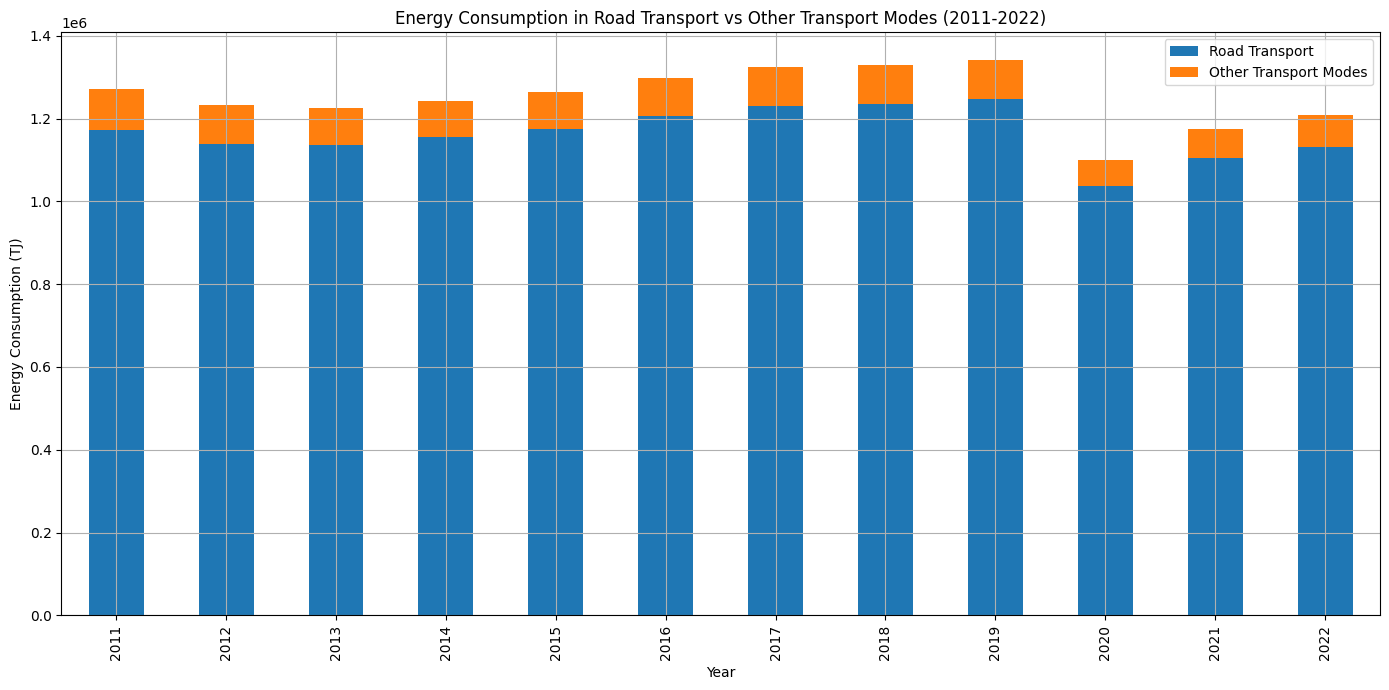

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('../data/energy_consumption.db')

# Read the data from SQLite tables
df_total = pd.read_sql_query('SELECT * FROM FECT_Total', conn)
df_road = pd.read_sql_query('SELECT * FROM FECT_Road', conn)

# Close the database connection
conn.close()

# Convert time_period to datetime and extract the year
df_total['year'] = pd.to_datetime(df_total['time_period']).dt.year
df_road['year'] = pd.to_datetime(df_road['time_period']).dt.year

# Filter the data for the years 2011 to 2022
filtered_total_energy = df_total[(
    df_total['year'] >= 2011) & (df_total['year'] <= 2022)]
filtered_road_energy = df_road[(
    df_road['year'] >= 2011) & (df_road['year'] <= 2022)]

# Summarize the data to visualize
total_energy = filtered_total_energy.groupby(['geographic_area', 'year'])[
    'energy_consumption_value'].sum().reset_index()
road_energy = filtered_road_energy.groupby(['geographic_area', 'year'])[
    'energy_consumption_value'].sum().reset_index()

# Merge datasets to compare
merged_energy_filtered = pd.merge(total_energy, road_energy, on=[
                                  'geographic_area', 'year'], suffixes=('_total', '_road'))

# Calculate the energy consumption for other transport modes
merged_energy_filtered['energy_consumption_value_others'] = merged_energy_filtered['energy_consumption_value_total'] - \
    merged_energy_filtered['energy_consumption_value_road']

# Aggregate data to get the sum of energy consumption for road and other transport modes for each year
agg_data = merged_energy_filtered.groupby('year')[
    ['energy_consumption_value_road', 'energy_consumption_value_others']].sum().reset_index()

# Plotting the data as a stacked bar graph
agg_data.set_index('year', inplace=True)
agg_data.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Year')
plt.ylabel('Energy Consumption (TJ)')
plt.title('Energy Consumption in Road Transport vs Other Transport Modes (2011-2022)')
plt.legend(['Road Transport', 'Other Transport Modes'])
plt.grid(True)
plt.tight_layout()
plt.show()

**Comparison of Energy Consumption in Road Transport vs. Other Transport Modes (2011-2022)**

Title: "Energy Consumption in Road Transport vs. Other Transport Modes (2011-2022)"
Description: This comparison will illustrate the energy consumption in road transport compared to other transport modes such as rail, domestic aviation, and navigation over the years 2011 to 2022. This can help in understanding the dominance of road transport in the total energy consumption of the transport sector.

**Analysis of Comparison of Energy Consumption in Road Transport vs. Other Transport Modes (2011-2022)**

***1. Overall Trend:***

The total energy consumption (sum of road and other transport modes) has remained relatively stable from 2011 to 2022.
There is a noticeable dip in energy consumption in 2020, which aligns with the global reduction in transport activity due to the COVID-19 pandemic.

***2. Road Transport:***
Road transport consistently accounts for the majority of energy consumption in the transport sector.
The blue bars representing road transport energy consumption show a steady pattern, indicating that road transport is a dominant and stable component of the total energy consumption.

***3. Other Transport Modes:***
The energy consumption by other transport modes (represented by the orange bars) is significantly smaller compared to road transport.
There is a slight increase in the energy consumption of other transport modes post-2020, possibly due to the recovery and increased activities in sectors like aviation and rail after the pandemic restrictions were lifted.

***4. Yearly Observations:***
2011-2019: The pattern of energy consumption is quite stable with minor fluctuations. Both road and other transport modes show consistency in their respective shares.
2020: Marked decrease due to the pandemic, reflecting reduced mobility and transport activities across all modes.
2021-2022: Recovery phase where energy consumption levels start to return to pre-pandemic levels. The road transport sector resumes its dominant role, while other transport modes also show recovery.
Implications

***5. Climate Impact:***
The dominance of road transport in energy consumption suggests that any interventions to reduce energy use and emissions in the transport sector must prioritize road transport.
The relatively small share of other transport modes in the total energy consumption indicates potential areas for improvement and investment to shift some of the transport demand from road to more energy-efficient and sustainable modes like rail.
Policy Recommendations:

Sustainable Road Transport: Implement policies promoting electric vehicles, improved fuel efficiency standards, and public transportation systems to reduce the carbon footprint of road transport.
Enhancing Other Modes: Invest in infrastructure and technology for other transport modes such as rail and waterways to make them more competitive and attractive alternatives to road transport.

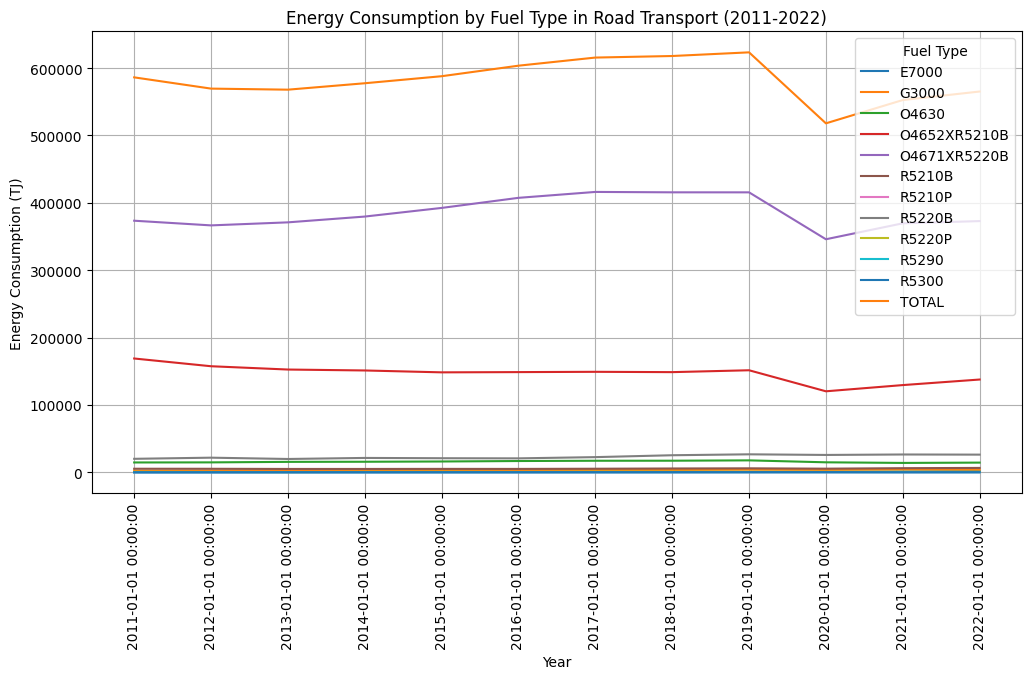

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('../data/energy_consumption.db')

# Query to get energy consumption data by fuel type in road transport
query = """
SELECT time_period, specific_energy_product, SUM(energy_consumption_value) AS total_energy_consumption
FROM FECT_Road
GROUP BY time_period, specific_energy_product
ORDER BY time_period, specific_energy_product
"""

# Load data into a DataFrame
df_road_fuel = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Pivot the data for plotting
df_pivot = df_road_fuel.pivot(
    index='time_period', columns='specific_energy_product', values='total_energy_consumption')

# Plot the data
plt.figure(figsize=(12, 6))
for fuel_type in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[fuel_type], label=fuel_type)

plt.title('Energy Consumption by Fuel Type in Road Transport (2011-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TJ)')
plt.legend(title='Fuel Type')
plt.grid(True)
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

**Comparison of Energy Consumption by Fuel Type in Road Transport (2011-2022)**

Title: "Energy Consumption by Fuel Type in Road Transport (2011-2022)"
Description: This comparison will focus on the types of fuel used in road transport and their respective energy consumption from 2011 to 2022. It can provide insights into which fuels are most heavily used in road transport and how their usage trends have changed over time.

***Fuel Types***
[TOTAL] - Total
[G3000] - Natural gas
[O4630] - Liquefied petroleum gases
[O4652XR5210B] - Motor gasoline (excluding biofuel portion)
[O4661XR5230B] - Kerosene-type jet fuel (excluding biofuel portion)
[O4671XR5220B] - Gas oil and diesel oil (excluding biofuel portion)
[O4680] - Fuel oil
[R5210P] - Pure biogasoline
[R5210B] - Blended biogasoline
[R5220P] - Pure biodiesels
[R5220B] - Blended biodiesels
[R5290] - Other liquid biofuels
[R5300] - Biogases
[E7000] - Electricity

**Analysis of Energy Consumption by Fuel Type in Road Transport (2011-2022)**

***1. Dominant Fuel Types:***
The fuel type labeled "TOTAL" (likely representing the total energy consumption across all fuel types) shows the highest consumption throughout the period.
Among specific fuel types, the most significant contributors to energy consumption are:
O4630
O4652XR5210B
O4671XR5220B

***2. Trends Over Time:***
O4630: Shows a steady increase in energy consumption until around 2020, followed by a slight decrease towards 2022.
O4652XR5210B: Maintains a relatively stable consumption with a slight upward trend over the years.
O4671XR5220B: Demonstrates a declining trend in energy consumption, especially noticeable after 2018.

***3. Other Fuel Types:***
The fuel types with labels like E7000, G3000, and others have relatively lower consumption levels. Their trends are less pronounced compared to the dominant fuel types but indicate varying patterns of increase or decrease over the years.
Yearly Variations:

There are noticeable fluctuations in some fuel types, indicating changes in fuel preferences, availability, or possibly policy impacts over the years.

***4. Yearly Variations:***
There are noticeable fluctuations in some fuel types, indicating changes in fuel preferences, availability, or possibly policy impacts over the years.


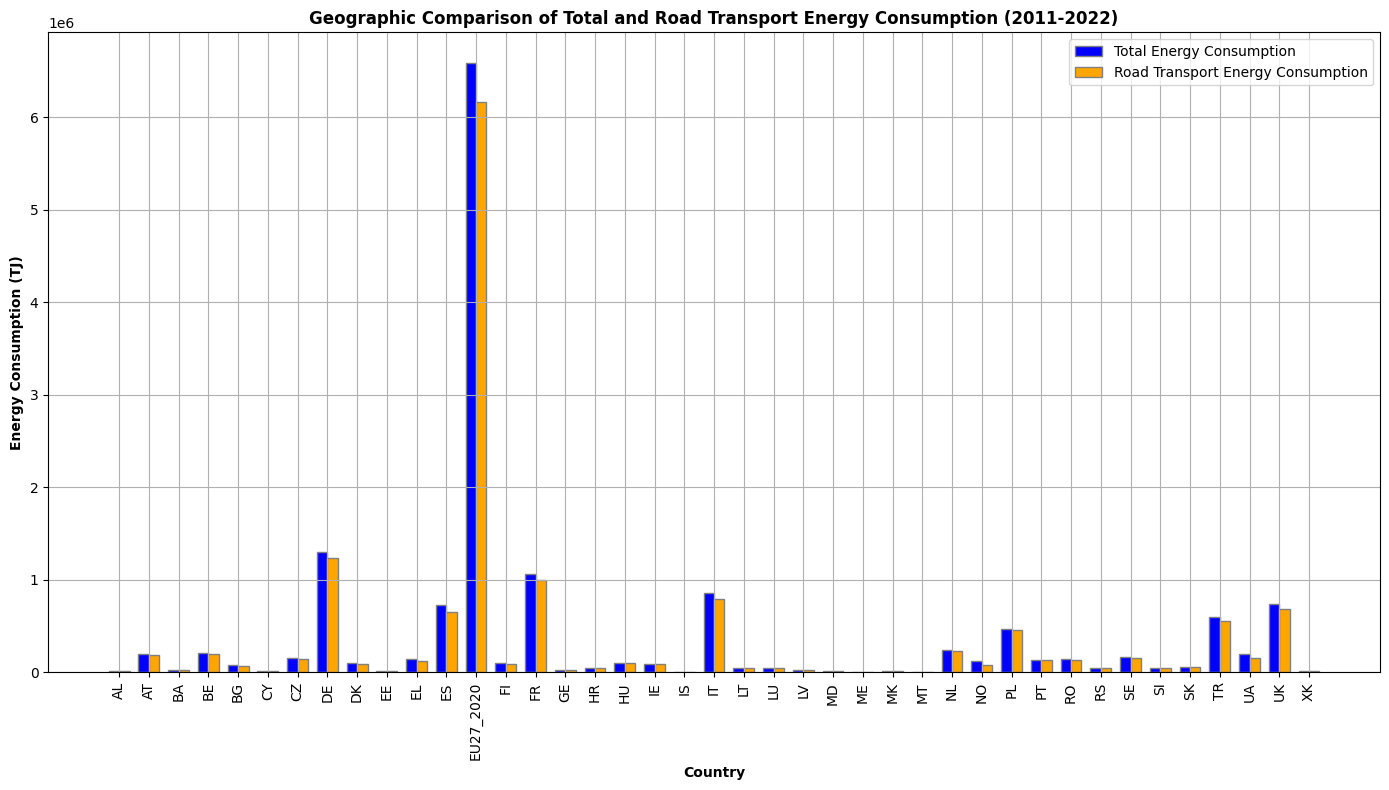

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('../data/energy_consumption.db')

# Query total energy consumption by country
query_total = """
SELECT geographic_area, SUM(energy_consumption_value) AS total_energy_consumption
FROM FECT_Total
WHERE time_period >= '2011-01-01 00:00:00' AND time_period <= '2022-12-31 23:59:59'
GROUP BY geographic_area
"""

# Query road transport energy consumption by country
query_road = """
SELECT geographic_area, SUM(energy_consumption_value) AS road_energy_consumption
FROM FECT_Road
WHERE time_period >= '2011-01-01 00:00:00' AND time_period <= '2022-12-31 23:59:59'
GROUP BY geographic_area
"""

# Load data into DataFrames
df_total = pd.read_sql_query(query_total, conn)
df_road = pd.read_sql_query(query_road, conn)

# Merge DataFrames on geographic_area
df_merged = pd.merge(df_total, df_road, on='geographic_area', how='outer')

# Plotting
plt.figure(figsize=(14, 8))

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(df_merged['geographic_area']))
r2 = [x + bar_width for x in r1]

# Plot total energy consumption
plt.bar(r1, df_merged['total_energy_consumption'], color='blue',
        width=bar_width, edgecolor='grey', label='Total Energy Consumption')

# Plot road transport energy consumption
plt.bar(r2, df_merged['road_energy_consumption'], color='orange',
        width=bar_width, edgecolor='grey', label='Road Transport Energy Consumption')

# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df_merged['geographic_area']))],
           df_merged['geographic_area'], rotation=90)

# Add ylabel
plt.ylabel('Energy Consumption (TJ)', fontweight='bold')

# Add title
plt.title('Geographic Comparison of Total and Road Transport Energy Consumption (2011-2022)', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Close database connection
conn.close()

**Geographic Comparison of Total and Road Transport Energy Consumption (2011-2022)**

Title: "Geographic Comparison of Total and Road Transport Energy Consumption (2011-2022)"
Description: This comparison will look at the energy consumption in road transport versus total transport energy consumption across different geographic areas (countries) from 2011 to 2022. This will help identify which countries have the highest road transport energy consumption relative to their total transport energy consumption.

***Countrys***
[EU27_2020] - European Union - 27 countries (from 2020)
[EA20] - Euro area - 20 countries (from 2023)
[EA19] - Euro area - 19 countries (2015-2022)
[BE] - Belgium
[BG] - Bulgaria
[CZ] - Czechia
[DK] - Denmark
[DE] - Germany
[EE] - Estonia
[EL] - Greece
[ES] - Spain
[FI] - Finland
[FR] - France
[HR] - Croatia
[IE] - Ireland
[IT] - Italy
[CY] - Cyprus
[LV] - Latvia
[LT] - Lithuania
[LU] - Luxembourg
[HU] - Hungary
[MT] - Malta
[NL] - Netherlands
[AT] - Austria
[PL] - Poland
[PT] - Portugal
[RO] - Romania
[SI] - Slovenia
[SK] - Slovakia
[FI] - Finland
[SE] - Sweden
[IS] - Iceland
[LI] - Liechtenstein
[NO] - Norway
[CH] - Switzerland
[ME] - Montenegro
[MK] - North Macedonia
[AL] - Albania
[RS] - Serbia
[TR] - Türkiye
[BA] - Bosnia and Herzegovina
[XK] - Kosovo*
[MD] - Moldova
[UA] - Ukraine
[GE] - Georgia


**Analysis of Geographic Comparison of Total and Road Transport Energy Consumption (2011-2022)**

The chart displays the total energy consumption and road transport energy consumption across various countries from 2011 to 2022. Each country is represented by two bars: a blue bar for total energy consumption and an orange bar for road transport energy consumption.


***Dominance of Road Transport:***
In many countries, the orange bars (road transport energy consumption) represent a significant proportion of the blue bars (total energy consumption). This illustrates the dominant role of road transport in the overall energy usage within the transport sector for these countries.
Particularly, countries like Germany (DE), France (FR), and the UK (UK) show substantial energy consumption in road transport, nearly equaling the total transport energy consumption. This indicates a high dependency on road vehicles for transportation needs in these nations.
 
***Variations Across Countries:***
The disparity in energy consumption levels across different countries is quite evident. For example, some countries like Germany and France exhibit high energy consumption in both road and overall transport sectors, indicating robust transport activities.
In contrast, smaller countries or those with less developed transport infrastructures show considerably lower energy consumption figures, as seen in countries like Cyprus (CY) and Latvia (LV).

***Outliers and Unique Patterns:***

The EU27_2020 bar stands out due to its exceptionally high total energy consumption. This data point likely represents the combined energy consumption of the 27 EU countries in 2020, giving a consolidated view that dwarfs individual country figures.
Some countries show a higher proportion of road transport energy consumption relative to their total transport energy, suggesting that road transport is especially critical or preferred in these regions.

***Implications***
Policy and Infrastructure: The data underscores the need for targeted policies in countries with high road transport energy consumption to promote more sustainable and efficient transport solutions, such as electric vehicles and improved public transit systems.
Environmental Impact: Countries with high road transport energy consumption may face greater environmental challenges, emphasizing the importance of transitioning to cleaner, renewable energy sources and technologies in the transport sector.
Investment Opportunities: The data can guide investment in transport infrastructure, particularly in countries with growing transport energy demands, to enhance efficiency and sustainability.